# Computer Infrastructure Assignment 2025 

### Submission by Faolán Hamilton
-----

## Modules used throughout the assignment 

Standard python modules are imported first as per good practise guidelines

### Source documentation for the modules:
- datetime (https://docs.python.org/3/library/datetime.html)
- Pandas (https://pandas.pydata.org/docs/)
- Matplotlib (https://matplotlib.org/stable/api/pyplot_summary.html)
- yfinance (https://github.com/ranaroussi/yfinance)


In [1]:
# listing files in a directory
import os

# datetime - formatting date and time date
import datetime as dt

# pandas - generating DataFrames and plotting them
import pandas as pd

# matplotlib.pyplot - having more plotting functionality
import matplotlib.pyplot as plt

# format the datetime of plots
import matplotlib.dates as mdates

# Yahoo Finance API data - the stock data being analysed
import yfinance as yf

-----

## There are four problems in this assignment structured throughout this Jupyter Notebook as follows:
### - Name the Problem
### - Describe the Problem
### - Solve the Problem
----------

## Problem 1: Data from yfinance

### Name the Problem
##### Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)
##### The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds. Create the data folder if you don't already have one.

### Describe the Problem
##### There are several steps that need to be taken to solve the problem:
- Bring in the data
- Format it in the correct way
- Create a csv of the data, which is to be placed in a data folder

### Solve the Problem

#### yfinance download documentation
https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html

##### The abbreviated name of the relevant stock names has been provided. To find these abbreviated names, you can search on the official yahoo finance website (https://finance.yahoo.com/)

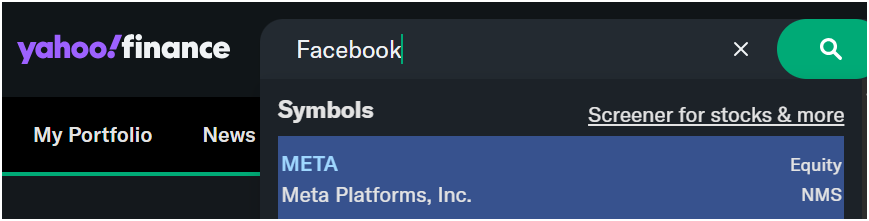

In [2]:
# Setting the DataFrame. This includes the data for the FAANG companies at a period of 5 days and 60 minute intervals
df = yf.download ('META AAPL AMZN NFLX GOOG', period = '5d', interval = '60m')
df.head(3)# Show the first three rows of the DataFrame to check column names and data structure.

/tmp/ipykernel_135350/452097128.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download ('META AAPL AMZN NFLX GOOG', period = '5d', interval = '60m')
[*********************100%***********************]  5 of 5 completed


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-15 14:30:00+00:00  274.144989  223.029999  307.730011  641.054993   
2025-12-15 15:30:00+00:00  275.510010  224.389999  308.829987  650.545105   
2025-12-15 16:30:00+00:00  274.920013  222.544998  306.142609  650.309998   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-15 14:30:00+00:00  94.004997  280.049988  227.500000  311.359985   
2025-12-15 15:30:00+00:00  94.430000  275.640411  224.389999  309.390015   
2025-12-15 16:30:00+00:00  94.000000  275.695007  224.500000  308.880005   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
Datetime                                          ...                           
2025-12-15 14:30:00+00:00  649.650024  96.065002  ...  280.000000  227.000000   
2025-12-15 15:30:00+00:00  650.760010  94.559998  ...  274.170013  223.039993   
2025-12-15 16:30:00+00:00  651.390015  94.441002  ...  275.540009  224.440002   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
Datetime                                                                
2025-12-15 14:30:00+00:00  310.625000  644.250000  96.000000  8113962   
2025-12-15 15:30:00+00:00  307.730011  640.929993  94.004997  3495538   
2025-12-15 16:30:00+00:00  308.839996  650.619995  94.430000  2136284   

Price                                                          
Ticker                        AMZN     GOOG     META     NFLX  
Datetime                                                       
2025-12-15 14:30:00+00:00  6475168  3980818  2264723  5610795  
2025-12-15 15:30:00+00:00  2713407  1244270  1317447  2675928  
2025-12-15 16:30:00+00:00  2914110  1951626   846923  2181275  

[3 rows x 25 columns]

In [3]:
# Looking at the DataFrame index to ensure there are 60m intervals
df.index

DatetimeIndex(['2025-12-15 14:30:00+00:00', '2025-12-15 15:30:00+00:00',
               '2025-12-15 16:30:00+00:00', '2025-12-15 17:30:00+00:00',
               '2025-12-15 18:30:00+00:00', '2025-12-15 19:30:00+00:00',
               '2025-12-15 20:30:00+00:00', '2025-12-16 14:30:00+00:00',
               '2025-12-16 15:30:00+00:00', '2025-12-16 16:30:00+00:00',
               '2025-12-16 17:30:00+00:00', '2025-12-16 18:30:00+00:00',
               '2025-12-16 19:30:00+00:00', '2025-12-16 20:30:00+00:00',
               '2025-12-17 14:30:00+00:00', '2025-12-17 15:30:00+00:00',
               '2025-12-17 16:30:00+00:00', '2025-12-17 17:30:00+00:00',
               '2025-12-17 18:30:00+00:00', '2025-12-17 19:30:00+00:00',
               '2025-12-17 20:30:00+00:00', '2025-12-18 14:30:00+00:00',
               '2025-12-18 15:30:00+00:00', '2025-12-18 16:30:00+00:00',
               '2025-12-18 17:30:00+00:00', '2025-12-18 18:30:00+00:00',
               '2025-12-18 19:30:00+00:00', '2025-1

#### Now to output the results as defined in the DataFrame into comma separated values using datetime
#### Source datetime.today(): https://docs.python.org/3/library/datetime.html#datetime.datetime.today

In [4]:
# The DataFrame is created from data from the past five working days, and so today's date is being used
today = dt.datetime.today()

#### Source strftime: https://docs.python.org/3/library/datetime.html#datetime.datetime.today

In [5]:
# This formats 'today' into an order that suits the file output name
today_format = today.strftime("%Y.%m.%d_%H.%M.%S")

#### Source Pandas DataFrame: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html

In [6]:
# This brings together the data and format name into a folder specifically created for the outputs
df.to_csv("data/" + "faangdata_" + today_format + ".csv")

-----
## Problem 2: Plotting the data

### Name the Problem
##### Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png. Create the plots folder if you don't already have one.

### Describe the Problem
- I need to call the latest data file (today's one) from the 'data' folder
- I need to plot all five closing prices in a well-formatted plot
- I need to save the plot into the 'plots' folder with a datetime formatted name

### Solve the Problem

In [7]:
# See the column headings to understand which data I need
df.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

##### Saving figures documentation Source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
##### Saving figures Stack overflow Source:(https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it)

##### Xaxis Datetime format Source: https://www.pythontutorials.net/blog/format-x-axis-on-chart-created-with-pandas-plot-method/#step-by-step-x-axis-formatting

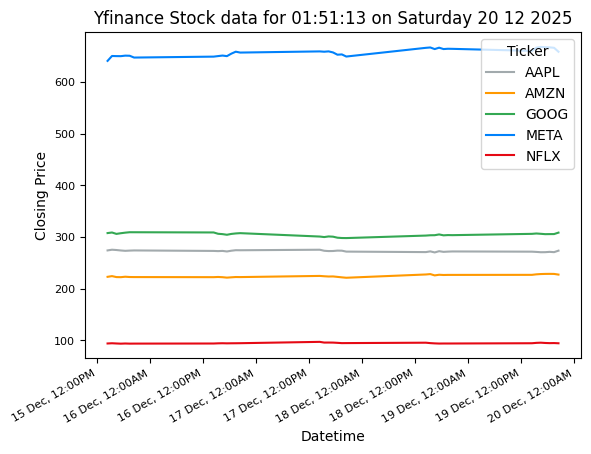

In [8]:
# Adding more functionality to the plot using fig,ax
fig, ax = plt.subplots()
# Using the company colours in the plot
colours = ('#A2AAAD', '#FF9900', '#34A853', '#0081FB', '#E50914')

date_formatter = mdates.DateFormatter('%d %b, %I:%M%p')  # %b = abbreviated month, %Y = 4-digit year
ax.xaxis.set_major_formatter(date_formatter)

# plotting all closing prices in the DataFrame
df['Close'].plot(color=colours, ax=ax, fontsize = 8)

# The DataFrame is created from data from the past five working days, and so today's date is being used
today = dt.datetime.today()

# This formats 'today''into an order that suits the file output name
today_format = today.strftime("%Y.%m.%d_%H.%M.%S")

# Formatting the date for the plot title 
title = today.strftime("%H:%M:%S on %A %d %m %Y")

# Setting the plot title
plt.title(f'Yfinance Stock data for {title}')

# Setting the y axis label
plt.ylabel('Closing Price')

# This brings together the data and format name into a folder specifically created for the outputs
plotname = "plots/" + "faangdata_" + today_format + ".webp"

# Save the figure into the plot folder as a webp which displays a higher quality image digitally with lower storage
fig.savefig(plotname, dpi = 500)

-----
## Problem 3: Script

### Name the Problem

##### Create a Python script called faang.py in the root of your repository. Copy the above functions into it and it so that whenever someone at the terminal types ./faang.py, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook.

### Describe the Problem
I will need to:
- Give instructions on how to use the file
- Figure out how to use the shebang line
- Ensure all relevant lines of code are in the file, nothing more
- Ensure the code can be run independently on another device 
- Create a plot within the file 

### Solve the Problem

#### I gave the user a line at the start and end to understand how to run the file. I also ensured that only necessary code is within this file to keep it as clear as possible. I can see the file can be run within the repository and does not require access to local files. 

#### Source: Lecture 25 running script by Ian McLoughlin. 
#### Ensuring anyone can run the file on their device is a step that needs to be set up using chmod u+x faang.py in the terminal

#### Despite attempting several different methods and browsers, I was not able to output the plot in the .py file. I copied the code to VS Code and the plot showed perfectly without needing to be saved. I looked at a lot of sources on this and implemented the methods (matplotlib.use('Agg)), plt.show(block=True) but to no avail. In the end, I saved the plot into the plots folder and informed the user how to navigate there to the view the plot.

#### Some of the sources used to research plot display:
##### https://stackoverflow.com/questions/36269746/matplotlib-plots-arent-shown-when-running-file-from-bash-terminal

##### https://stackoverflow.com/questions/74330611/python3-plot-not-showing-in-wsl

##### https://copilot.microsoft.com/shares/bjrtriPDJvtxgXLbQ46cK

-----
## Problem 4: Automation
### Name the Problem:
##### Create a GitHub Actions workflow to run your script every Saturday morning. The script should be called faang.yml in a .github/workflows/ folder in the root of your repository. In your notebook, explain each of the individual lines in your workflow.

### Describe the Problem:
I have to:
- Install and navigate to GitHub Actions
- Ensure my action is set-up correctly and has permission
- Run the faang.py file
- Commits the changes back to the repository

### Solve the Problem:

#### The biggest changes I had to make to the code was the modules listed in the requirements.txt file. Keeping only the files used helped the code to run smoothly

##### I have used Co-Pilot to write this GitHub action and update any relevant pieces
##### I have asked the AI to provide it's sources as well
##### Source: https://copilot.microsoft.com/shares/bCdPaXcuxGBhpWbqK5a3x

### This is a copy of the faang.yml file, I will comment beside each line to explain the purpose
----

##### Calling the code a name, this is important as it will appear in the Actions tab of the repository
name: Run faang.py and push changes

##### Setting the running parameter - setting a schedule ensures the code is run at a previously designated time, while allowing for a workflow_dispatch allows for manual runs for checking
on:
  schedule:
    # Runs every day at 03:00 UTC — adjust as needed
    # https://crontab.guru/#0_1_*_*_*
    - cron: "19 7 * * 6"
  workflow_dispatch:  # allows manual runs

##### While the action sits within the repository, it does not automatically have access to the repository contents. This allows for the yml to push content back to the repository
permissions:
  contents: write   # REQUIRED to push back to the repository

##### Setting the jobs the action will complete - this is done on the latest version available.
jobs:
  update:
    runs-on: ubuntu-latest

##### Clones the repository allowing for changes to be pushed at a later stage, as described by Co-Pilot
    steps:
      - name: Checkout repository
        uses: actions/checkout@v6
        with:
          token: ${{ secrets.GITHUB_TOKEN }}

##### Install python - Python is needed to run the scrip and is important to bring into this step. As per the AI description, this ensures a predictable environment
      - name: Set up Python
        uses: actions/setup-python@v5
        with:
          python-version: "3.x"

##### Installing all relevant modules used in the faang.py file - these are all listed in the requirements.txt file which I have updated 
      - name: Install dependencies
        run: |
          pip install -r requirements.txt

##### Actually running the python file 
      - name: Run faang.py
        run: python faang.py

##### Committing the changes to the repository. This creates it's own username and email, adding in a standardised commit message to inform all that this commit was done automatically
      - name: Commit changes
        run: |
          git config user.name "github-actions[bot]"
          git config user.email "github-actions[bot]@users.noreply.github.com"
          git add -A
          git commit -m "Automated update from download.py" || echo "No changes to commit"

##### Pushing the changes to the repository
      - name: Push changes
        run: |
          git push     

### I tested the GitHub actions for a random time any morning to see if the action would run, and it did! I then set it to 9:53 every Saturday morning in line with the assignment guidelines

-----
# END
-----